In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats
import statsmodels.api as sm

estandarizar los datos para la qqplot o cambiarle los parametros a la qq plot


In [ ]:
datos_jugo_a = np.array([20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23])
datos_jugo_b = np.array([19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18])

In [ ]:
df = pd.DataFrame({'Jugo A': datos_jugo_a, 'Jugo B': datos_jugo_b})
df

In [ ]:
#estandarizar datos
#datos_jugo_a_estandarizados = (datos_jugo_a - np.mean(datos_jugo_a)) / np.std(datos_jugo_a, ddof=1)
#datos_jugo_b_estandarizados = (datos_jugo_b - np.mean(datos_jugo_b)) / np.std(datos_jugo_b, ddof=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_estandar =scaler.fit_transform(df)
df_estandar=pd.DataFrame(df_estandar,columns=df.columns)

<Figure size 800x600 with 0 Axes>

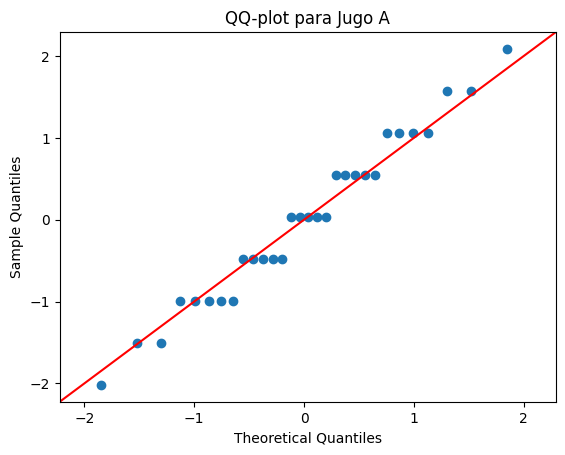

In [ ]:
# Paso 2: QQ-plot
plt.figure(figsize=(8, 6))
sm.qqplot(df_estandar['Jugo A'], line ='45')
plt.title("QQ-plot para Jugo A")
plt.show()


<Figure size 800x600 with 0 Axes>

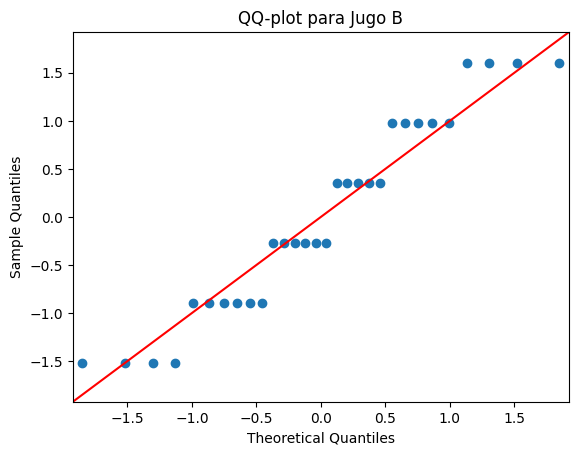

In [ ]:
plt.figure(figsize=(8, 6))
sm.qqplot(df_estandar['Jugo B'], line ='45')
plt.title("QQ-plot para Jugo B")
plt.show()

In [1]:
# Paso 3: Test de Kolmogorov-Smirnov
from scipy.stats import kstest
ks_statistic_a = kstest(df_estandar['Jugo A'], 'norm')
ks_statistic_b = kstest(df_estandar['Jugo B'], 'norm')
print(ks_statistic_a)
print(ks_statistic_b)


NameError: ignored

ambos p valores son relativamente altos. Por eso no tenemos suficiente evidencia para rechazar la hipótesis nula de que los datos provienen de una distribución normal con un nivel de confianza del 99%.



In [ ]:
# Paso 4 y 5: Cálculo del intervalo de confianza para distribución normal (no se usa t student porque el pvalor salio alto para los dos jugos)
import scipy.stats as st
p=1-((1/100)/2)
VC= st.norm.ppf(p)
VC


media_a = np.mean(df['Jugo A'])
media_b = np.mean(df['Jugo B'])

std_a = np.std(df['Jugo A'], ddof=1)
std_b = np.std(df['Jugo B'], ddof=1)

n_a = len(df['Jugo A'])
n_b = len(df['Jugo B'])

intervalo_a = (media_a - VC * (std_a / np.sqrt(n_a)), media_a + VC * (std_a / np.sqrt(n_a)))
intervalo_b = (media_b - VC * (std_b / np.sqrt(n_b)), media_b + VC * (std_b / np.sqrt(n_b)))

print(f"Intervalo de confianza del {confianza * 100}% para Jugo A: ({intervalo_a[0]:.4f}, {intervalo_a[1]:.4f})")
print(f"Intervalo de confianza del {confianza * 100}% para Jugo B: ({intervalo_b[0]:.4f}, {intervalo_b[1]:.4f})")

Intervalo de confianza del 99.0% para Jugo A: (23.0015, 24.8652)
Intervalo de confianza del 99.0% para Jugo B: (19.6652, 21.2015)


In [ ]:
#calcular el ancho
Ancho_jugoA = intervalo_a[1] - intervalo_a[0]
anchoA = f"{Ancho_jugoA:.4f}"
print("Ancho del Jugo A", anchoA)

Ancho_jugoB = intervalo_b[1] - intervalo_b[0]
anchob = f"{Ancho_jugoB:.4f}"
print("Ancho del Jugo B", anchob)

Ancho del Jugo A 1.8637
Ancho del Jugo B 1.5363


### Álvaro Morán Errejón A01638034